In [4]:
import os, shutil
import pandas as pd

out_dir = "D:/token_count_project/diagrams"
os.makedirs(out_dir, exist_ok=True)

print("Diagrams folder ready:", out_dir)


Diagrams folder ready: D:/token_count_project/diagrams


In [5]:
csv_path = "D:/token_count_project/output/token_counts.csv"

pdf = pd.read_csv(csv_path)
pdf.columns = ["InvoiceDate", "TotalTokens"]
pdf["InvoiceDate"] = pd.to_datetime(pdf["InvoiceDate"])

pdf = pdf.sort_values("InvoiceDate").reset_index(drop=True)

print("Full DataFrame shape:", pdf.shape)
pdf.head()


Full DataFrame shape: (75, 2)


,InvoiceDate,TotalTokens
0,2011-01-04,5447
1,2011-01-05,8043
2,2011-01-06,8404
3,2011-01-07,8292
4,2011-01-09,5223


In [6]:
USE_FILTER = True   # 👉 set to False if you want full dataset

if USE_FILTER:
    start_date = "2011-01-01"
    end_date = "2011-03-31"

    pdf_filtered = pdf[
        (pdf["InvoiceDate"] >= start_date) &
        (pdf["InvoiceDate"] <= end_date)
    ].reset_index(drop=True)

    data = pdf_filtered
    print("Using FILTERED (Jan–March) dataset:", data.shape)
else:
    data = pdf
    print("Using FULL dataset:", data.shape)

data.head()


Using FILTERED (Jan–March) dataset: (75, 2)


,InvoiceDate,TotalTokens
0,2011-01-04,5447
1,2011-01-05,8043
2,2011-01-06,8404
3,2011-01-07,8292
4,2011-01-09,5223


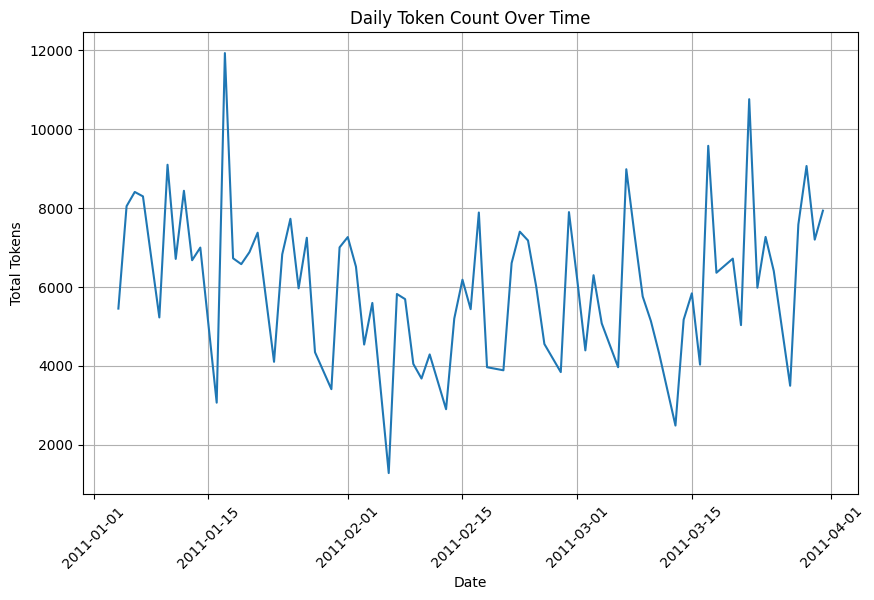

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data["InvoiceDate"], data["TotalTokens"])
plt.xticks(rotation=45)
plt.title("Daily Token Count Over Time")
plt.ylabel("Total Tokens")
plt.xlabel("Date")
plt.grid(True)

plt.savefig("D:/token_count_project/diagrams/tokens_time_series.png", bbox_inches='tight')
plt.show()


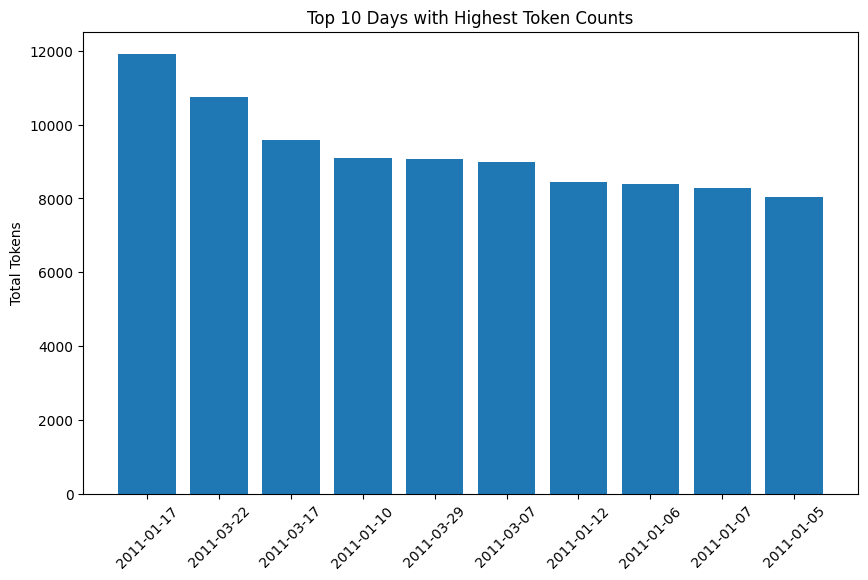

In [8]:
top10 = data.sort_values("TotalTokens", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10["InvoiceDate"].astype(str), top10["TotalTokens"])
plt.xticks(rotation=45)
plt.title("Top 10 Days with Highest Token Counts")
plt.ylabel("Total Tokens")

plt.savefig("D:/token_count_project/diagrams/top10_tokens.png", bbox_inches='tight')
plt.show()


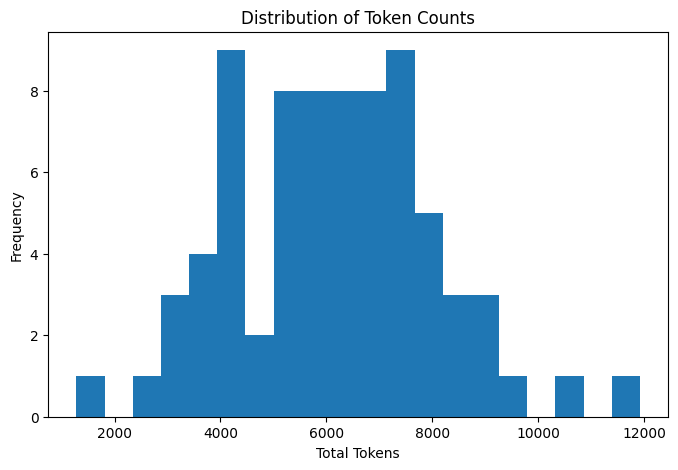

In [9]:
plt.figure(figsize=(8,5))
plt.hist(data["TotalTokens"], bins=20)
plt.title("Distribution of Token Counts")
plt.xlabel("Total Tokens")
plt.ylabel("Frequency")

plt.savefig("D:/token_count_project/diagrams/token_distribution.png", bbox_inches='tight')
plt.show()


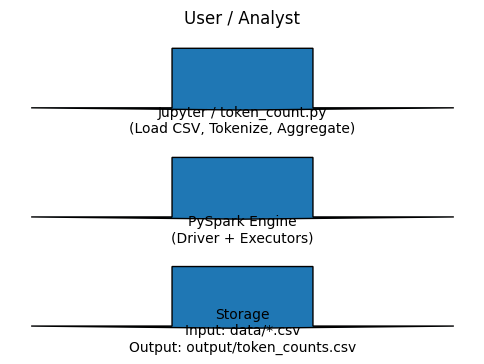

Saved: D:/token_count_project/diagrams\architecture_diagram.png


In [10]:
plt.figure(figsize=(6,4))
plt.text(0.5,0.9,"User / Analyst", ha='center', fontsize=12)
plt.arrow(0.5,0.85,0, -0.12)
plt.text(0.5,0.68,"Jupyter / token_count.py\n(Load CSV, Tokenize, Aggregate)", ha='center')
plt.arrow(0.5,0.63,0, -0.12)
plt.text(0.5,0.46,"PySpark Engine\n(Driver + Executors)", ha='center')
plt.arrow(0.5,0.41,0, -0.12)
plt.text(0.5,0.24,"Storage\nInput: data/*.csv\nOutput: output/token_counts.csv", ha='center')
plt.axis('off')

arch_path = os.path.join(out_dir, "architecture_diagram.png")
plt.savefig(arch_path, bbox_inches='tight')
plt.show()

print("Saved:", arch_path)


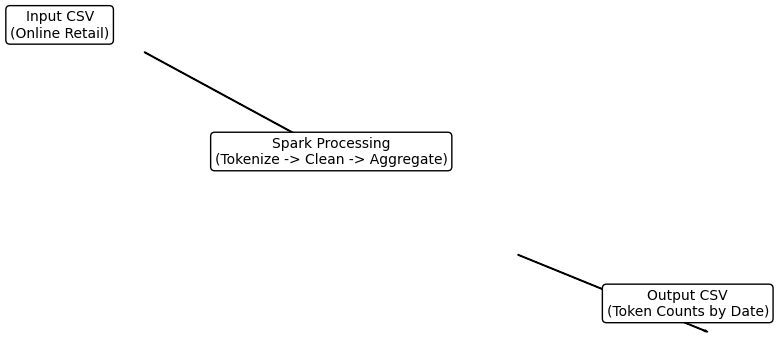

Saved: D:/token_count_project/diagrams\dfd_diagram.png


In [11]:
plt.figure(figsize=(8,4))
plt.text(0.18,0.75,"Input CSV\n(Online Retail)", ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.arrow(0.28,0.72,0.22, -0.2)
plt.text(0.5,0.5,"Spark Processing\n(Tokenize -> Clean -> Aggregate)", ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.arrow(0.72,0.32,0.22, -0.15)
plt.text(0.92,0.2,"Output CSV\n(Token Counts by Date)", ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.axis('off')

dfd_path = os.path.join(out_dir, "dfd_diagram.png")
plt.savefig(dfd_path, bbox_inches='tight')
plt.show()

print("Saved:", dfd_path)


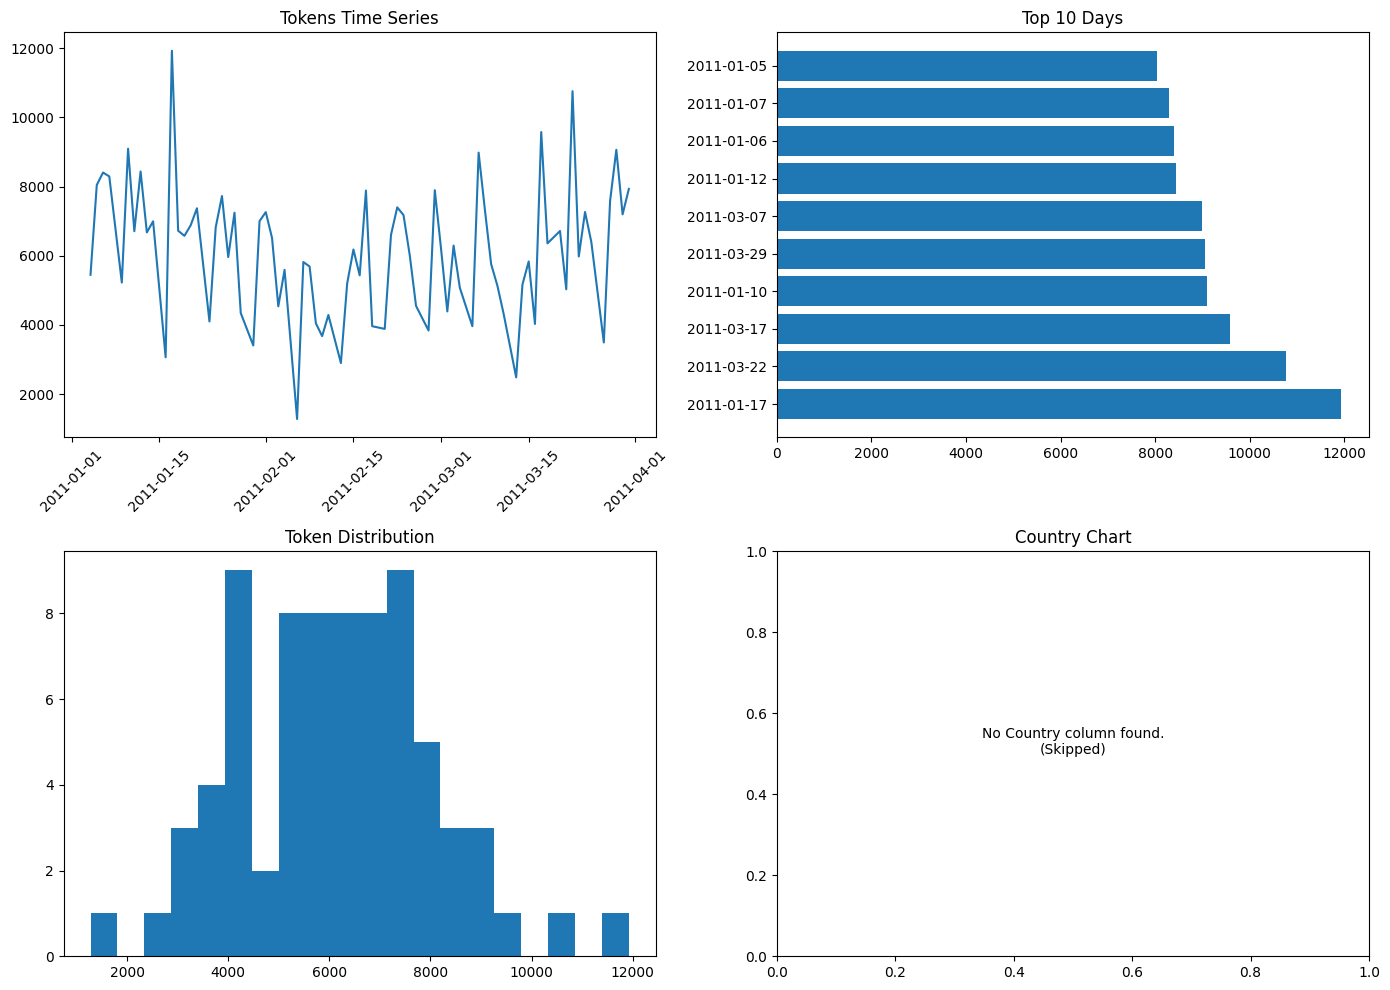

Saved: D:/token_count_project/diagrams\dashboard.png


In [12]:
fig, axs = plt.subplots(2,2, figsize=(14,10))

# time series
axs[0,0].plot(data['InvoiceDate'], data['TotalTokens'])
axs[0,0].set_title("Tokens Time Series")
axs[0,0].tick_params(axis='x', rotation=45)

# top 10
axs[0,1].barh(top10['InvoiceDate'].dt.strftime('%Y-%m-%d'), top10['TotalTokens'])
axs[0,1].set_title("Top 10 Days")

# histogram
axs[1,0].hist(data['TotalTokens'], bins=20)
axs[1,0].set_title("Token Distribution")

# no country
axs[1,1].text(0.5,0.5,"No Country column found.\n(Skipped)", ha='center')
axs[1,1].set_title("Country Chart")

plt.tight_layout()
combo_out = os.path.join(out_dir, "dashboard.png")
plt.savefig(combo_out, bbox_inches='tight')
plt.show()

print("Saved:", combo_out)
